In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file into a dictionary of DataFrames
xlsx_file = pd.read_excel('data/HEAT_Tables_0419.xlsx', sheet_name=['RP1', 'Abj_outputs', 'Jhb_outputs'])

# Extract each DataFrame from the dictionary
df_rp1 = xlsx_file['RP1']
df_abj = xlsx_file['Abj_outputs']
df_jhb = xlsx_file['Jhb_outputs']

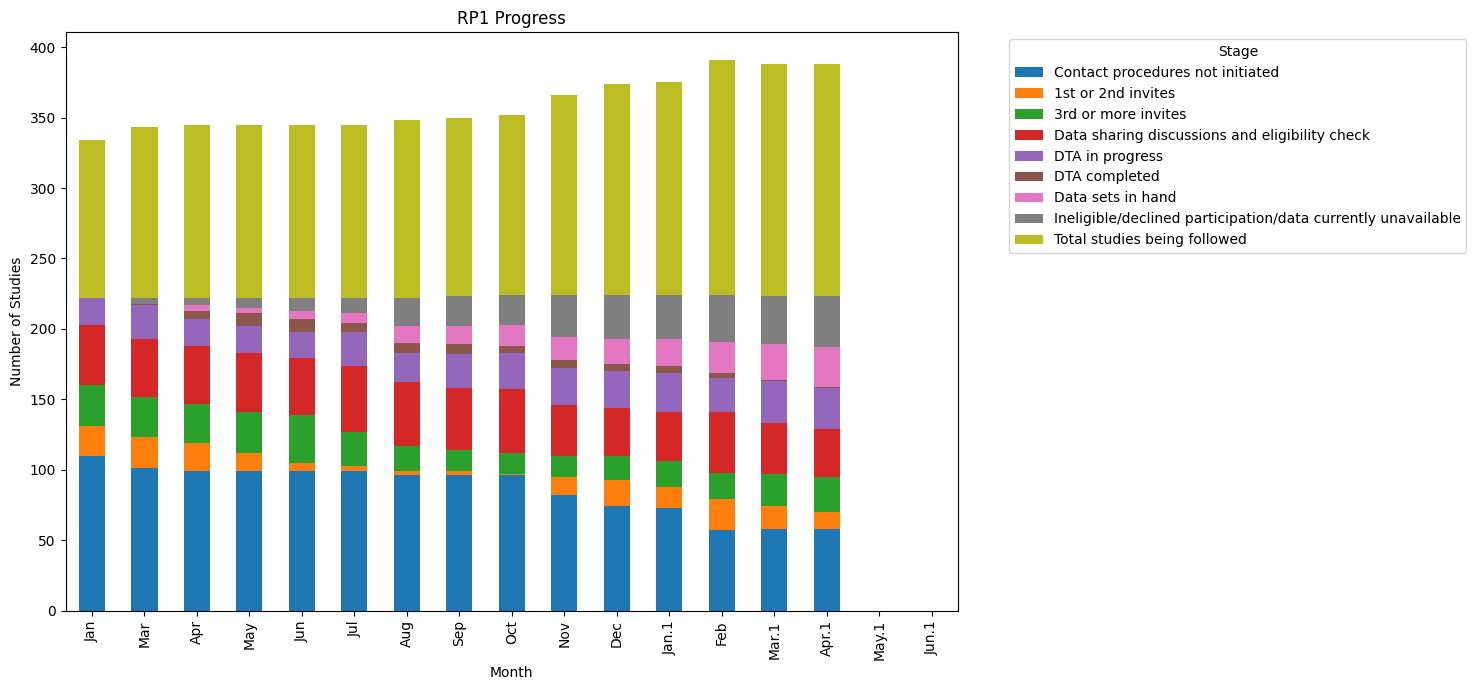

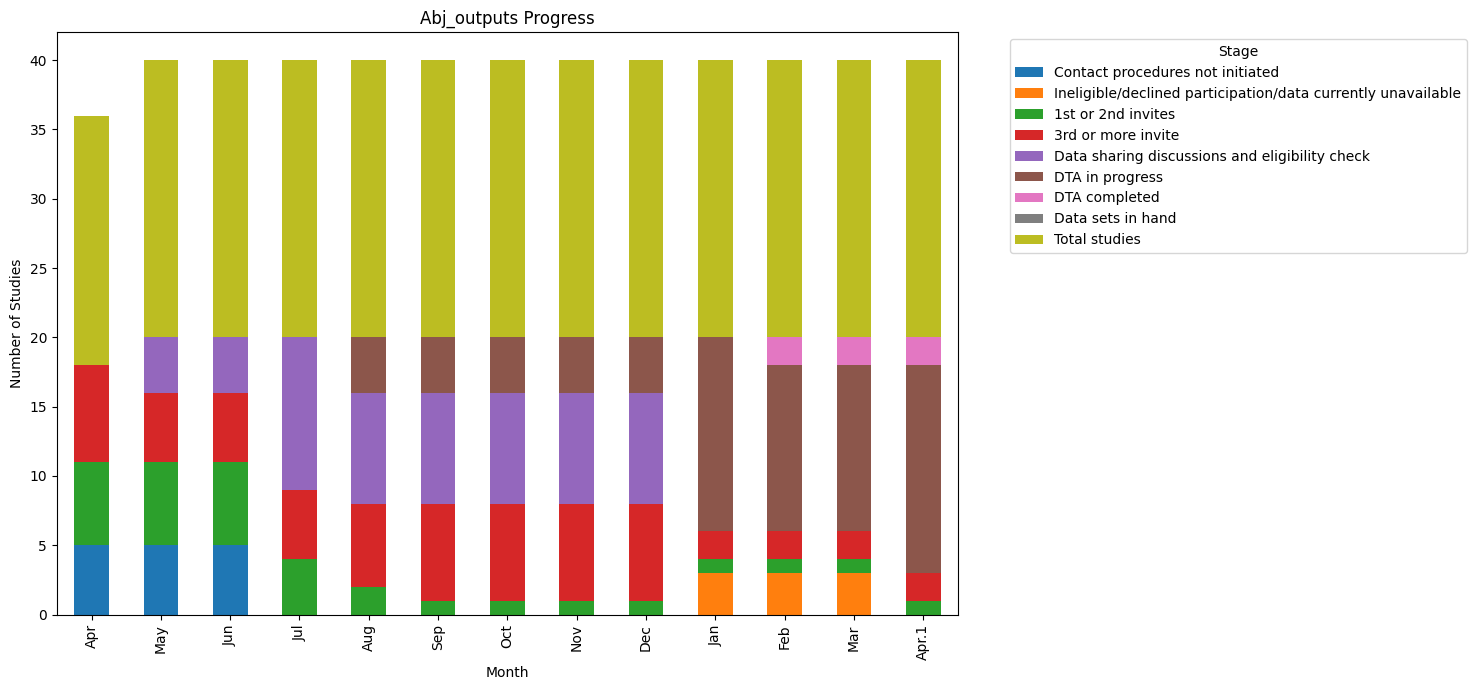

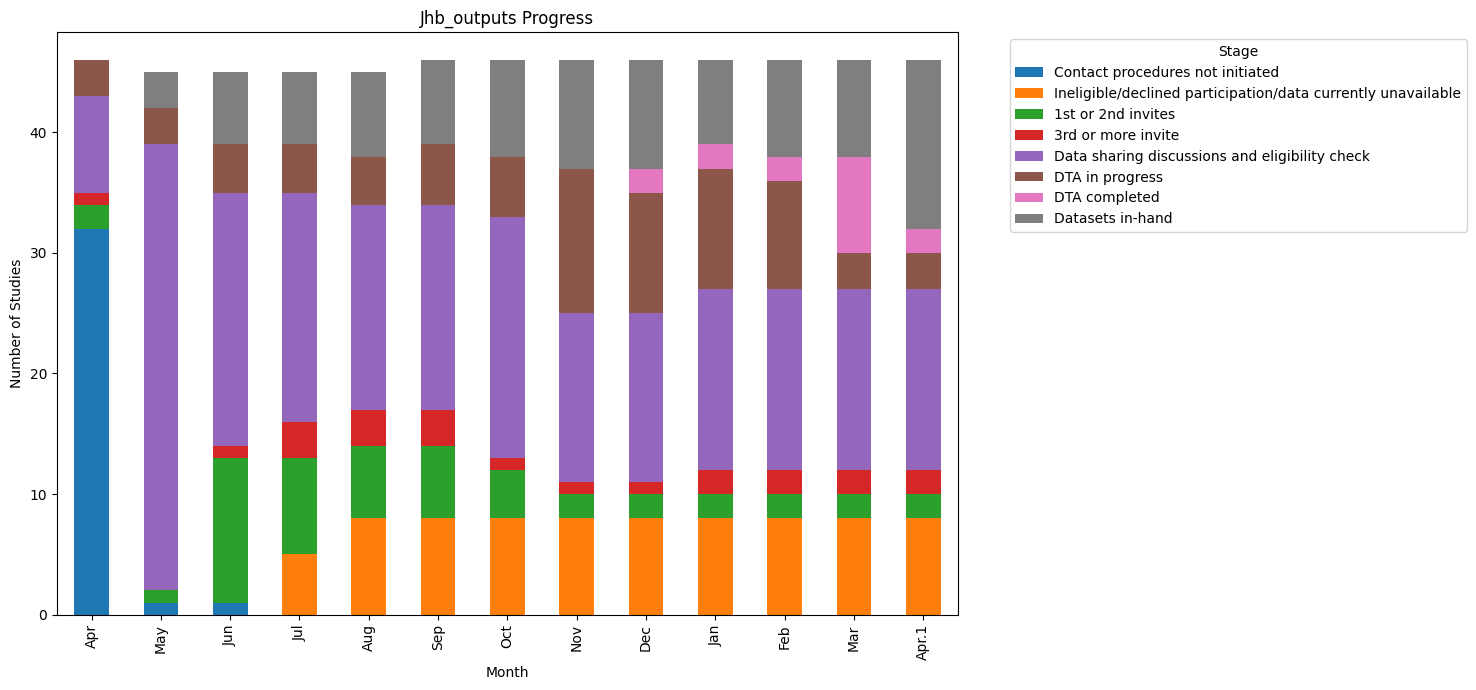

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file into a dictionary of DataFrames
xlsx_file = pd.read_excel('data/HEAT_Tables_0419.xlsx', sheet_name=['RP1', 'Abj_outputs', 'Jhb_outputs'])

# Extract each DataFrame from the dictionary
df_rp1 = xlsx_file['RP1']
df_abj = xlsx_file['Abj_outputs']
df_jhb = xlsx_file['Jhb_outputs']

# The rest of your code remains the same...

# Example plotting function for a single dataframe
def plot_stacked_bar_chart(df, title):
    # Drop the total number of studies row as it's not a stage
    stages_df = df[df['Stage'] != 'Total number of studies'].set_index('Stage')
    
    # Transpose the dataframe to have stages as columns and months as rows
    transposed_df = stages_df.transpose()
    
    # Plot stacked bar chart
    transposed_df.plot(kind='bar', stacked=True, figsize=(15, 7))
    
    # Add titles and labels
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Number of Studies')
    plt.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

# Plot for each DataFrame
plot_stacked_bar_chart(df_rp1, 'RP1 Progress')
plot_stacked_bar_chart(df_abj, 'Abj_outputs Progress')
plot_stacked_bar_chart(df_jhb, 'Jhb_outputs Progress')

# Show plots
plt.show()



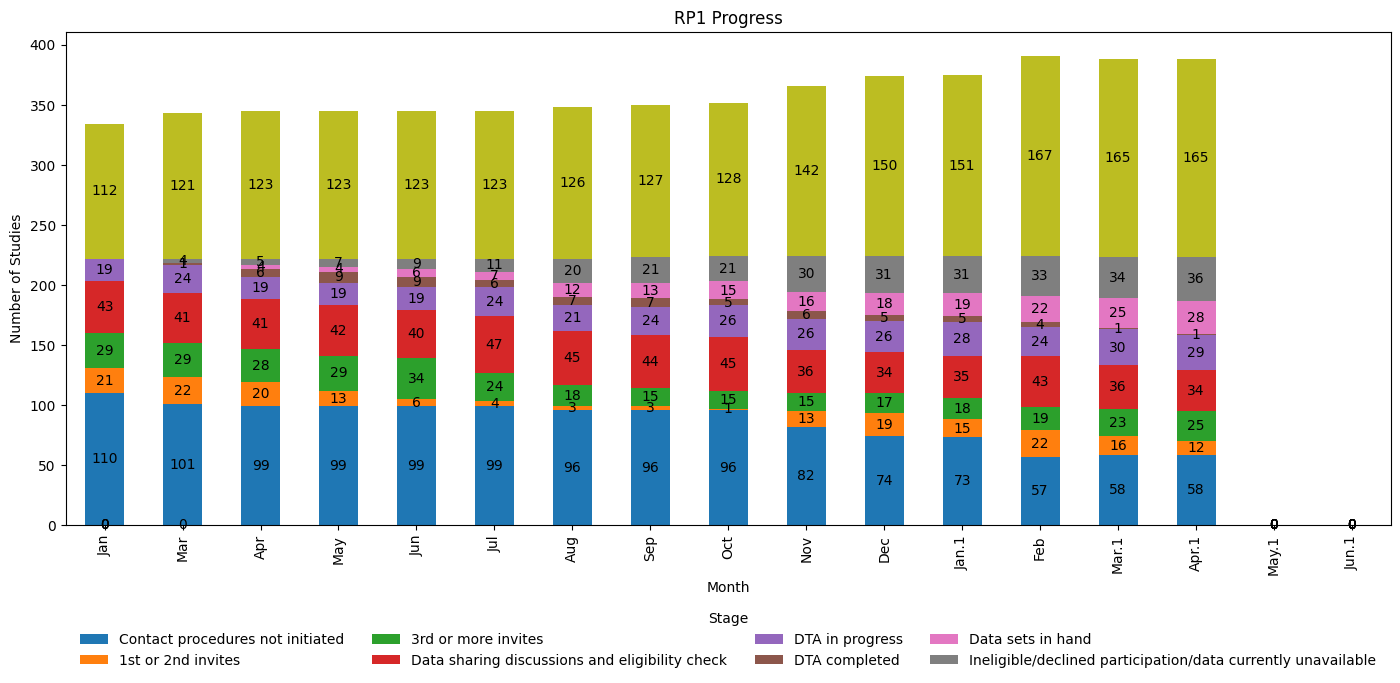

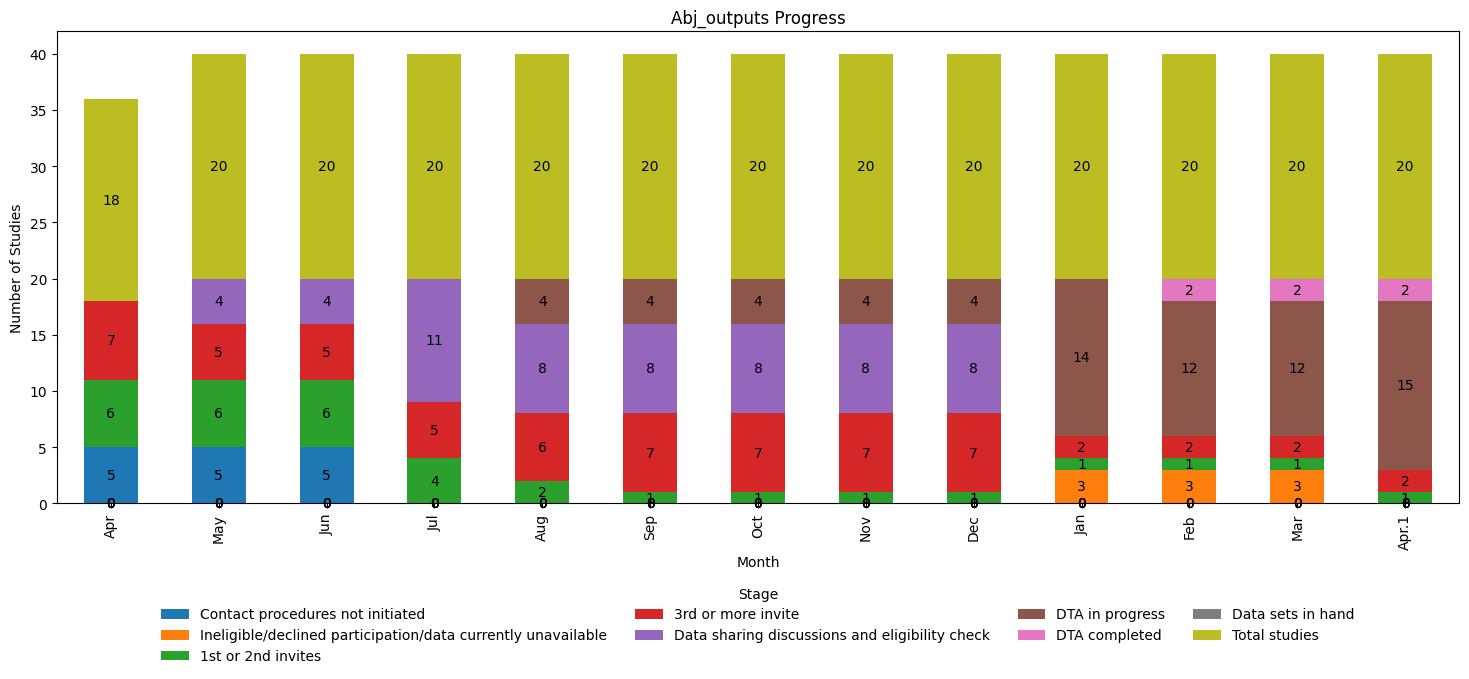

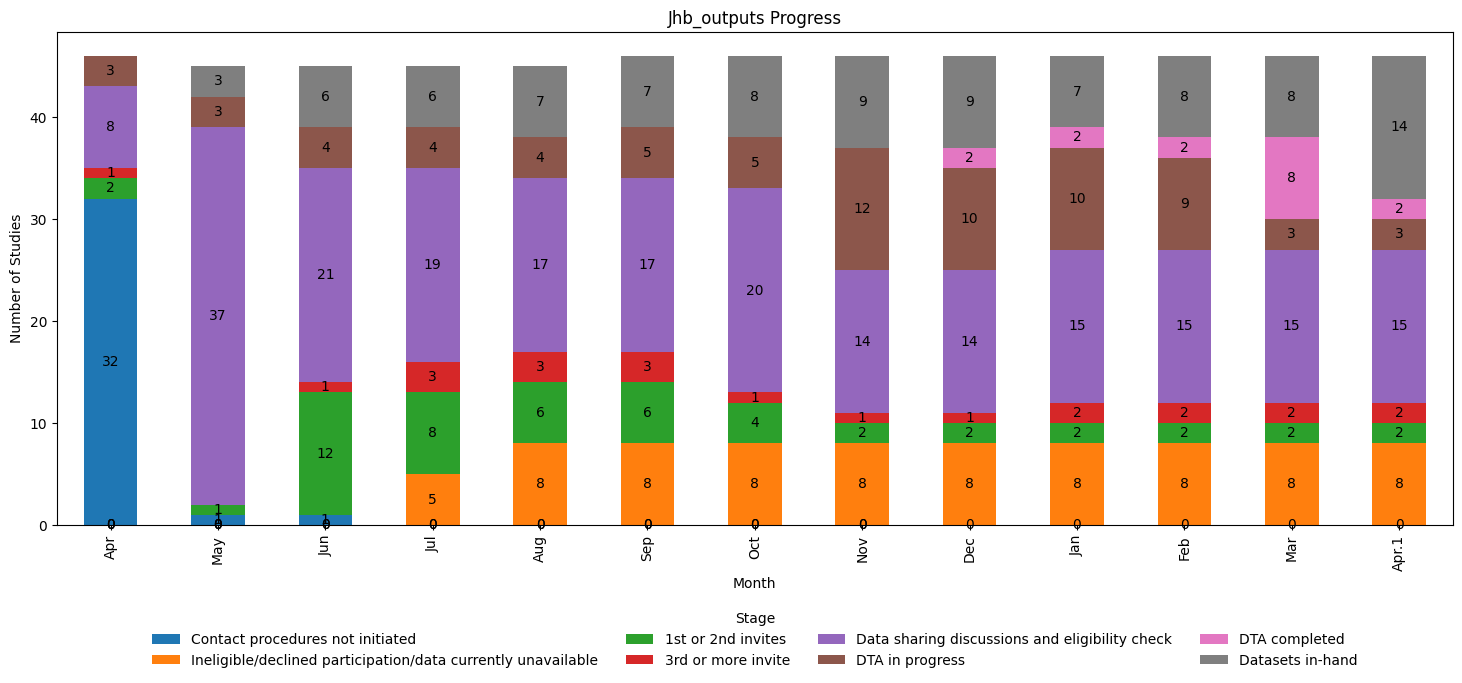

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already read the data into df_rp1, df_abj, df_jhb

# Example plotting function for a single dataframe
def plot_stacked_bar_chart(df, title):
    # Drop the total number of studies row as it's not a stage
    stages_df = df[df['Stage'] != 'Total number of studies'].set_index('Stage')
    
    # Transpose the dataframe to have stages as columns and months as rows
    transposed_df = stages_df.transpose()
    
    # Plot stacked bar chart
    ax = transposed_df.plot(kind='bar', stacked=True, figsize=(15, 7))
    
    # Annotate the number of studies within each stack with whole numbers
    for bar in ax.containers:
        ax.bar_label(bar, label_type='center', fmt='%d')
    
    # Remove the 'Total studies being followed' from the legend, as it is not a stage
    handles, labels = ax.get_legend_handles_labels()
    filtered_handles = [h for h, l in zip(handles, labels) if l != 'Total studies being followed']
    filtered_labels = [l for l in labels if l != 'Total studies being followed']
    
    # Make legend more compact
    ax.legend(handles=filtered_handles, labels=filtered_labels, title='Stage', 
              bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4, frameon=False)
    
    # Add titles and labels
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Number of Studies')
    plt.tight_layout()

# Plot for each DataFrame
plot_stacked_bar_chart(df_rp1, 'RP1 Progress')
plot_stacked_bar_chart(df_abj, 'Abj_outputs Progress')
plot_stacked_bar_chart(df_jhb, 'Jhb_outputs Progress')

# Show plots
plt.show()


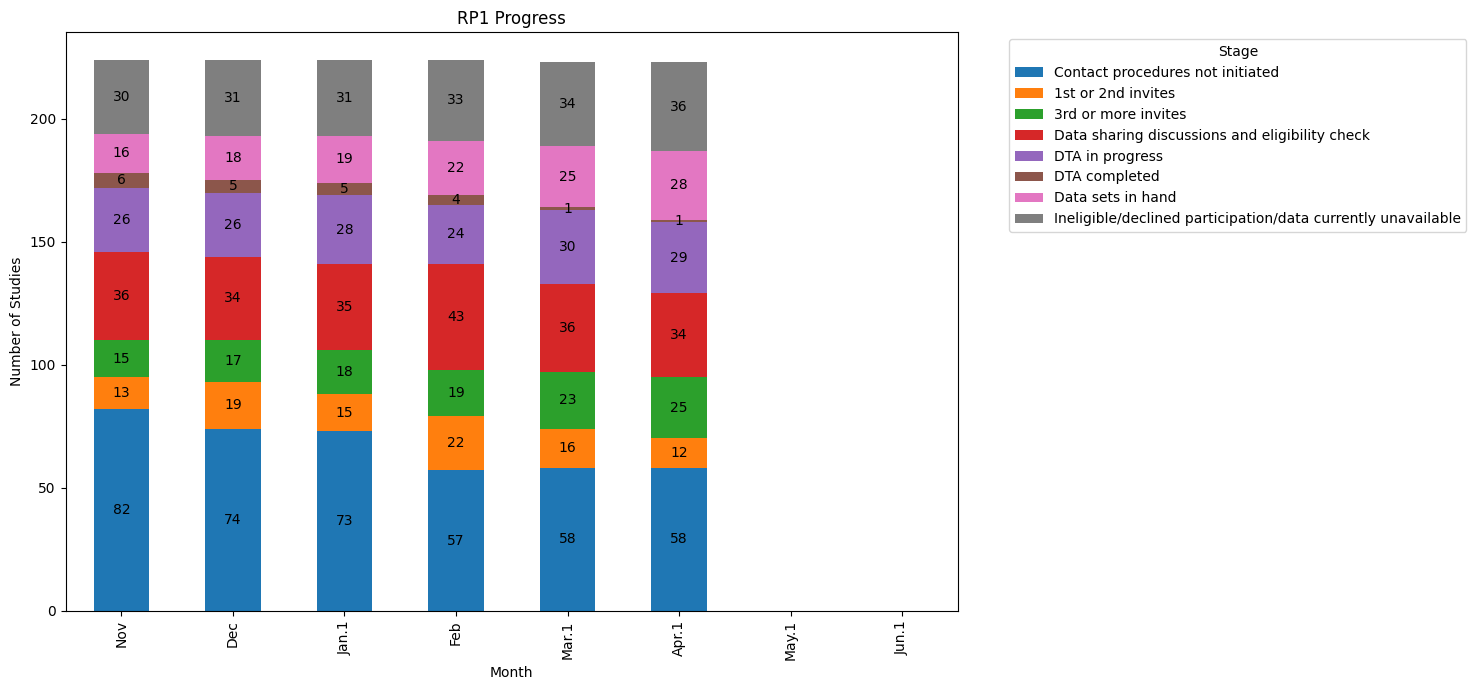

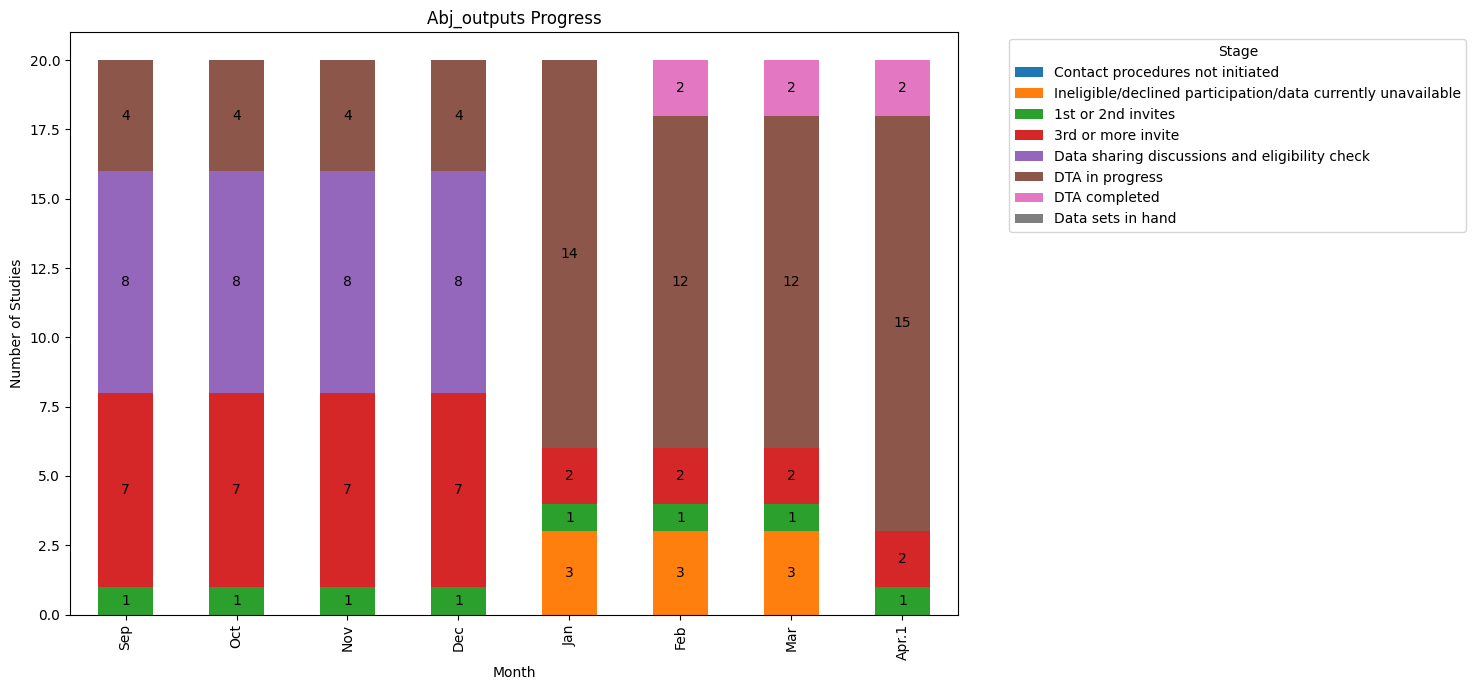

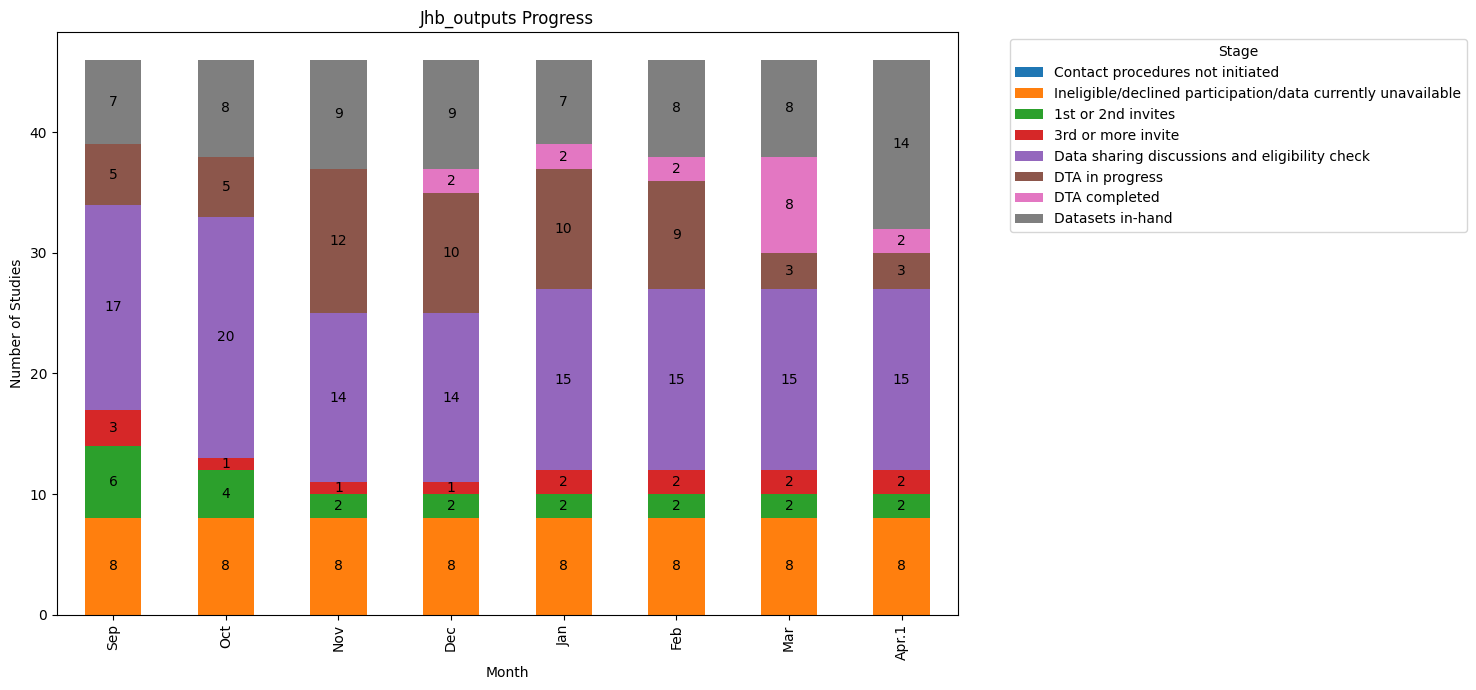

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Example plotting function for a single dataframe
def plot_stacked_bar_chart(df, title, last_n_months=8):
    # Drop the rows for totals as they are not stages
    stages_df = df.drop(df[df['Stage'].str.contains("Total")].index).set_index('Stage')
    
    # Transpose the dataframe to have stages as columns and months as rows
    transposed_df = stages_df.transpose()

    # Select the last_n_months
    transposed_df = transposed_df.iloc[-last_n_months:]
    
    # Plot stacked bar chart
    ax = transposed_df.plot(kind='bar', stacked=True, figsize=(15, 7))
    
    # Annotate the number of studies within each stack with whole numbers, but skip 0s
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%d', labels=[int(val.get_height()) if val.get_height() > 0 else '' for val in container])
    
    # Make legend more compact
    ax.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add titles and labels
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Number of Studies')
    plt.tight_layout()

# Assuming you have already read the data into df_rp1, df_abj, df_jhb
# Plot for each DataFrame
plot_stacked_bar_chart(df_rp1, 'RP1 Progress', last_n_months=8)
plot_stacked_bar_chart(df_abj, 'Abj_outputs Progress', last_n_months=8)
plot_stacked_bar_chart(df_jhb, 'Jhb_outputs Progress', last_n_months=8)

# Show plots
plt.show()


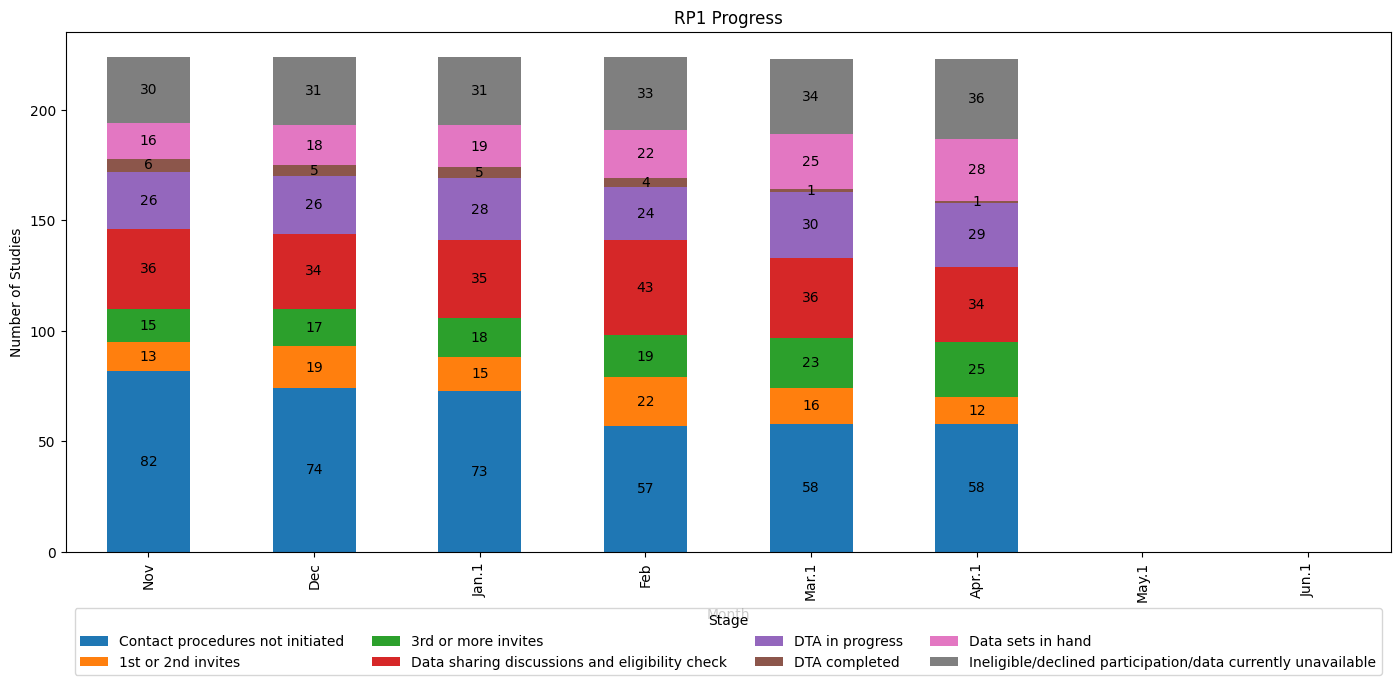

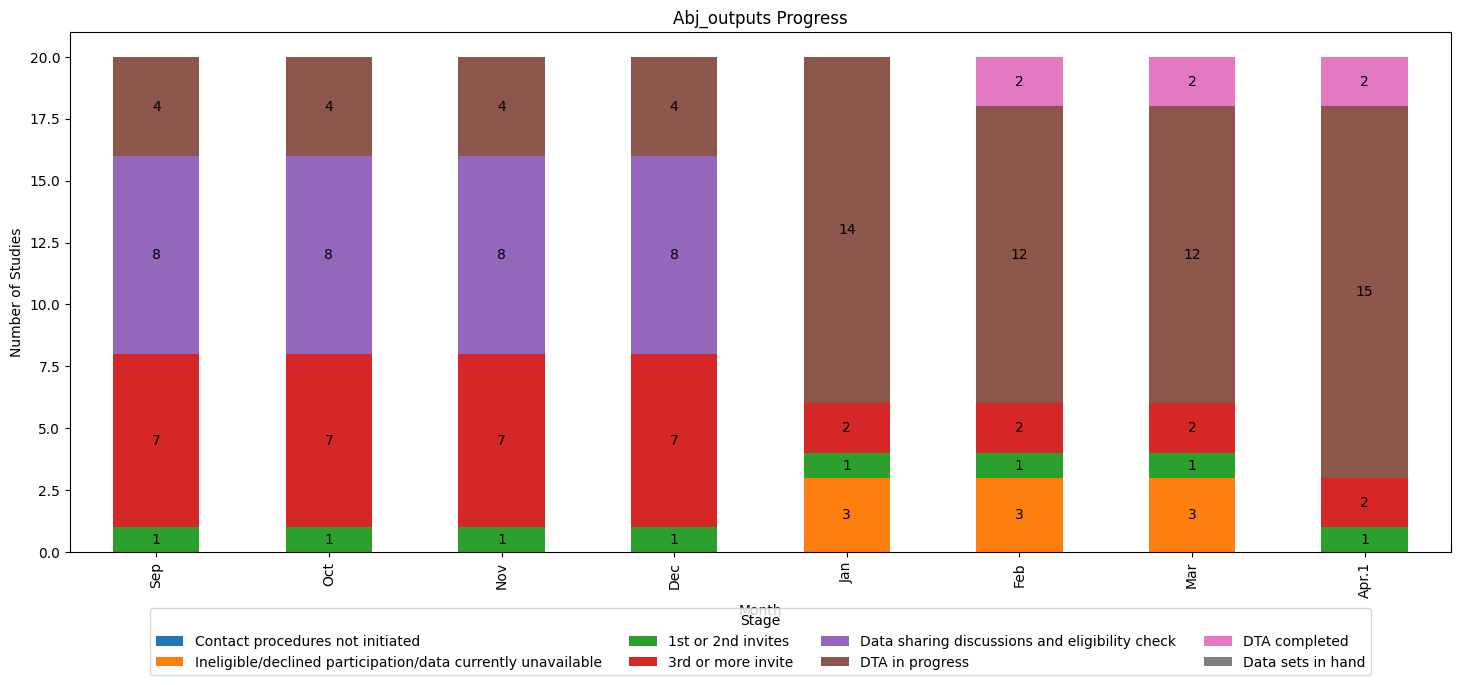

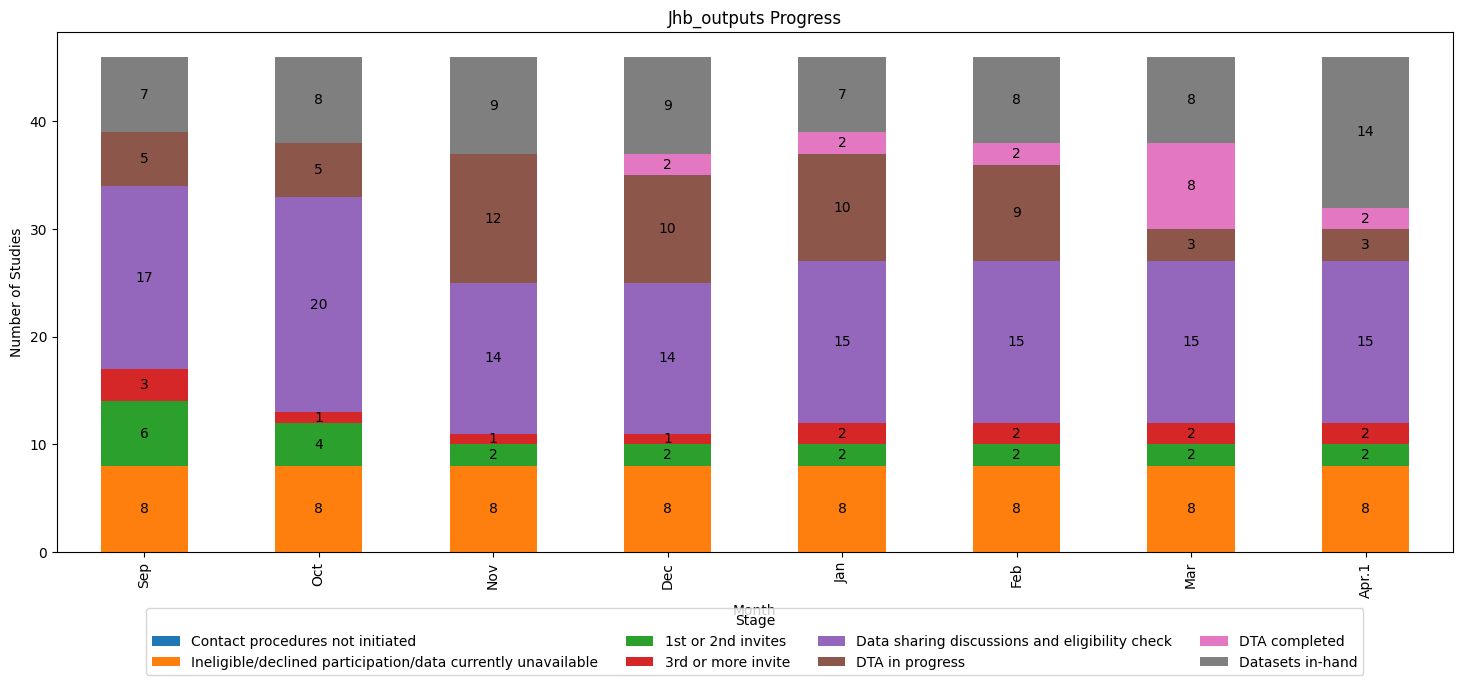

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Example plotting function for a single dataframe
def plot_stacked_bar_chart(df, title, last_n_months=8):
    # Drop the rows for totals as they are not stages
    stages_df = df.drop(df[df['Stage'].str.contains("Total")].index).set_index('Stage')
    
    # Transpose the dataframe to have stages as columns and months as rows
    transposed_df = stages_df.transpose()

    # Select the last_n_months
    transposed_df = transposed_df.iloc[-last_n_months:]
    
    # Plot stacked bar chart
    ax = transposed_df.plot(kind='bar', stacked=True, figsize=(15, 7))
    
    # Annotate the number of studies within each stack with whole numbers, but skip 0s
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%d', labels=[int(val.get_height()) if val.get_height() > 0 else '' for val in container])
    
    # Set legend below the chart with the same order as the bars
    handles, labels = ax.get_legend_handles_labels()
    ordered_labels = transposed_df.columns.tolist()
    ordered_handles = [handles[labels.index(lab)] for lab in ordered_labels if lab in labels]

    ax.legend(ordered_handles, ordered_labels, title='Stage', loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=int(len(ordered_handles)/2))

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Number of Studies')
    plt.tight_layout()

# Assuming you have already read the data into df_rp1, df_abj, df_jhb
# Plot for each DataFrame
plot_stacked_bar_chart(df_rp1, 'RP1 Progress', last_n_months=8)
plot_stacked_bar_chart(df_abj, 'Abj_outputs Progress', last_n_months=8)
plot_stacked_bar_chart(df_jhb, 'Jhb_outputs Progress', last_n_months=8)

# Show plots
plt.show()


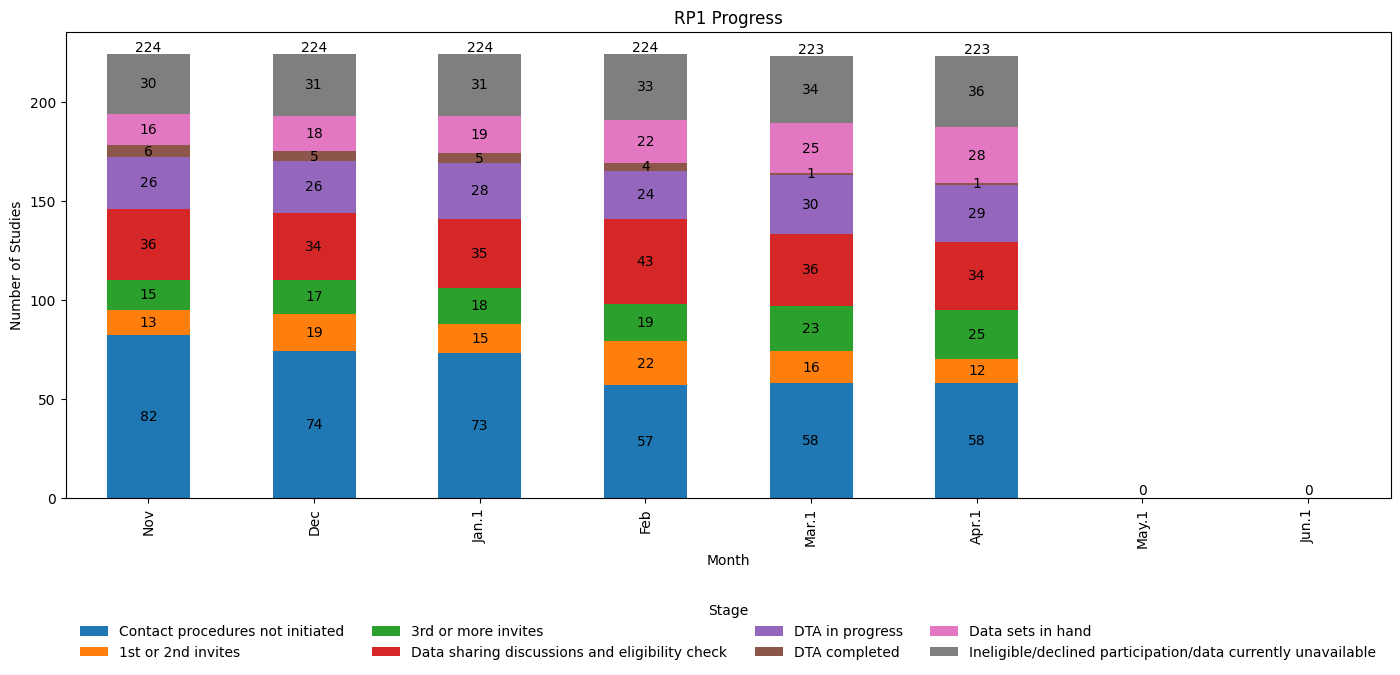

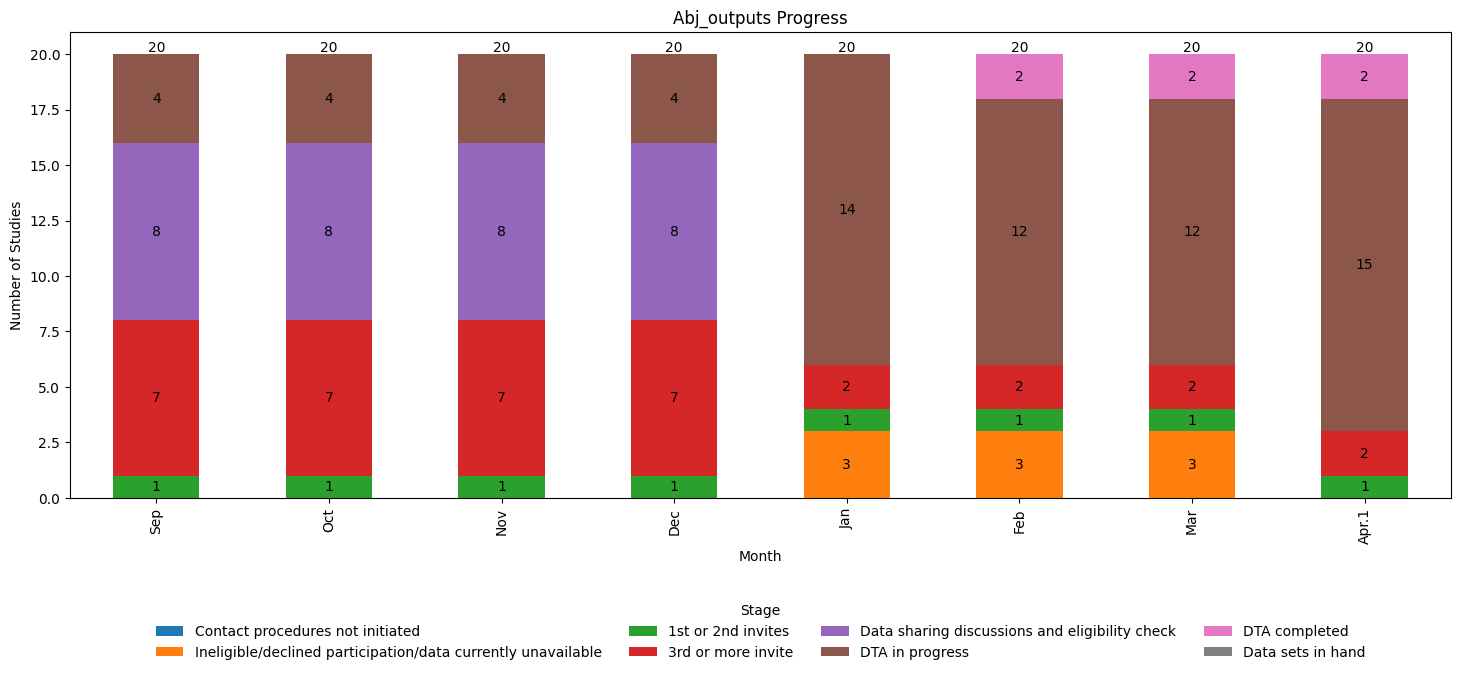

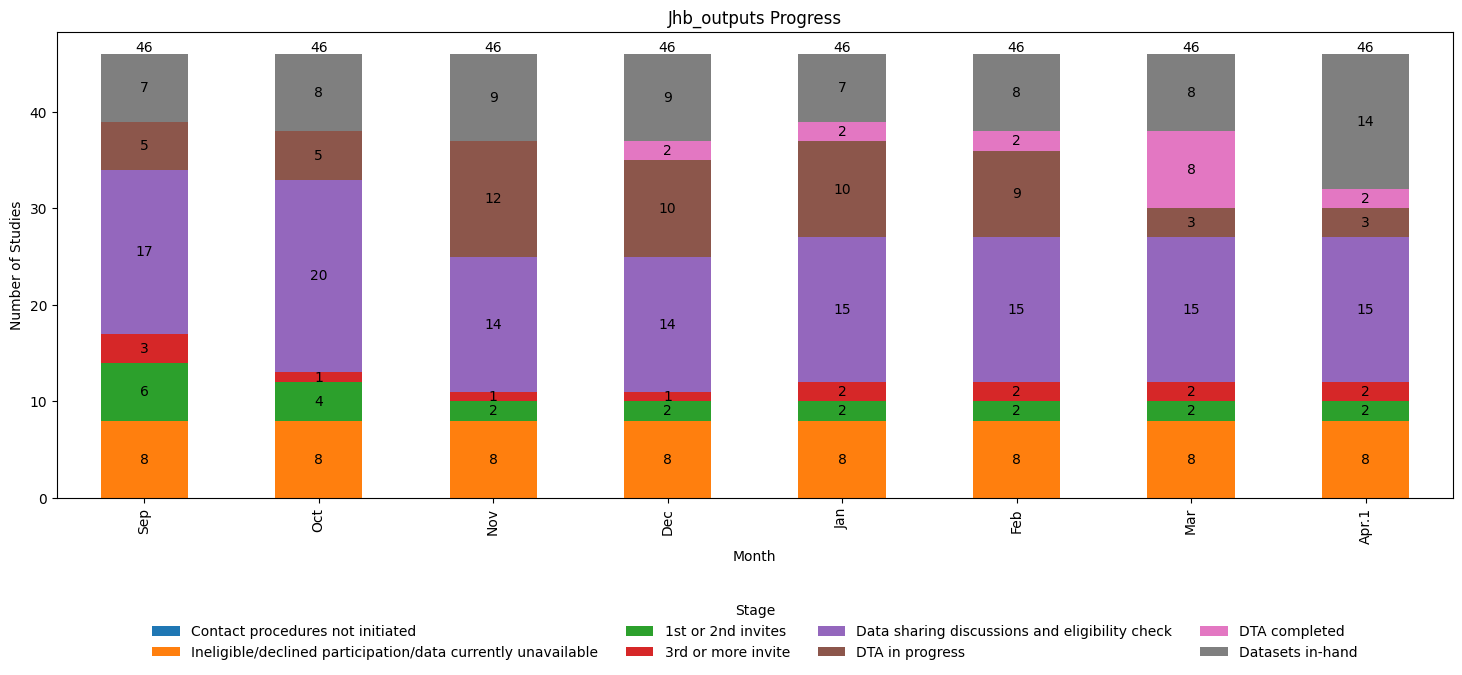

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Example plotting function for a single dataframe
def plot_stacked_bar_chart(df, title, last_n_months=8):
    # Drop the rows for totals as they are not stages
    stages_df = df.drop(df[df['Stage'].str.contains("Total")].index).set_index('Stage')
    
    # Transpose the dataframe to have stages as columns and months as rows
    transposed_df = stages_df.transpose()

    # Select the last_n_months
    transposed_df = transposed_df.iloc[-last_n_months:]
    
    # Plot stacked bar chart
    ax = transposed_df.plot(kind='bar', stacked=True, figsize=(15, 7))
    
    # Annotate the number of studies within each stack with whole numbers, but skip 0s
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%d', labels=[int(val.get_height()) if val.get_height() > 0 else '' for val in container])

    # Calculate the total number of studies for each month and annotate on top of the stack
    totals = transposed_df.sum(axis=1)
    for i, total in enumerate(totals):
        ax.text(i, total, str(int(total)), ha='center', va='bottom')
    
    # Adjust the legend position to not overlap with the x-axis labels
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='Stage', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, frameon=False)

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Number of Studies')
    plt.tight_layout()

# Assuming you have already read the data into df_rp1, df_abj, df_jhb
# Plot for each DataFrame
plot_stacked_bar_chart(df_rp1, 'RP1 Progress', last_n_months=8)
plot_stacked_bar_chart(df_abj, 'Abj_outputs Progress', last_n_months=8)
plot_stacked_bar_chart(df_jhb, 'Jhb_outputs Progress', last_n_months=8)

# Show plots
plt.show()


In [16]:
import plotly.graph_objects as go
import pandas as pd

def plotly_stacked_bar_chart(df, title, last_n_months=8):
    # Ensure that the 'Month' column exists and convert it to datetime
    if 'Month' not in df:
        df['Month'] = pd.date_range(end=pd.Timestamp.today(), periods=last_n_months, freq='M')
    else:
        df['Month'] = pd.to_datetime(df['Month'], errors='coerce')
    
    df = df.sort_values('Month').tail(last_n_months)
    
    # Drop the rows for totals as they are not stages
    stage_cols = df.columns[df.columns != 'Month']
    
    # Create a figure
    fig = go.Figure()
    for stage in stage_cols:
        fig.add_trace(go.Bar(
            x=df['Month'],
            y=df[stage],
            name=stage
        ))

    # Update the layout for a stacked bar chart
    fig.update_layout(
        barmode='stack',
        title=title,
        xaxis=dict(title='Month', type='category'),
        yaxis_title='Number of Studies',
        legend_title='Stage',
        legend=dict(yanchor="top", y=-0.2, xanchor="left", x=0.01)
    )

    fig.show()

# Assuming your DataFrame 'df_rp1' is preprocessed as per the requirements
plotly_stacked_bar_chart(df_rp1, 'RP1 Progress')


ValueError: Length of values (8) does not match length of index (10)